In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
# загружаем датасет
data = pd.read_csv('stud_math.csv')

# Цель проекта
ПРовести EDA анализ данных для построения модели отслеживания влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

## Описание датасета
#### Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

### Быстрый взгляд на данные.
Сразу видим что во многих колонках есть пропуски

In [3]:
data.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
182,GP,F,17,U,GT3,NaN,2.0,4.0,services,NaN,reputation,father,NaN,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,5.0,4.0,2.0,5.0,0.0,85.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,reputation,father,2.0,2.0,0.0,no,yes,no,NaN,yes,-6.0,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
16,GP,F,16,U,GT3,T,4.0,4.0,services,services,reputation,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,2.0,3.0,2.0,6.0,70.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
329,GP,F,17,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,4.0,70.0
123,GP,M,16,U,GT3,T,4.0,4.0,health,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,4.0,4.0,5.0,18.0,65.0
119,GP,M,15,U,GT3,T,3.0,4.0,other,other,reputation,father,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,4.0,3.0,4.0,6.0,65.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
124,GP,F,16,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,5.0,4.0,4.0,5.0,0.0,40.0
371,MS,M,18,R,LE3,T,1.0,2.0,at_home,services,other,father,3.0,1.0,0.0,no,yes,NaN,yes,yes,-3.0,no,yes,yes,4.0,3.0,3.0,3.0,3.0,60.0


### Посмотрим на данные повнимательнее
- Большая часть переменных номинативные, есть ранговые переменные и только 2 количественные, это количество прогулов и целевая с данными по оценке
- Во всех колонках, кроме первых трех есть пропуски
- В колонках Fedu, Famrel и absences есть аномалии
- Если не считать пропусков данные довольно хорошие
- Поскольку явных ошибок в данных всего 2, давайте пока поменяем их на пропуски

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,378,2,U,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,368,2,GT3,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,350,2,T,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,392,NaN,NaN,NaN,2.75,1.09813,0,2,3,4,4
Fedu,371,NaN,NaN,NaN,2.61456,2.22873,0,2,2,3,40
Mjob,376,5,other,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,359,5,other,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [6]:
data.nunique()

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

In [7]:
for column in data.columns:
    print('\n---count values for {} column---'.format(column), 
          data[column].value_counts(dropna=False), sep='\n')


---count values for school column---
GP    349
MS     46
Name: school, dtype: int64

---count values for sex column---
F    208
M    187
Name: sex, dtype: int64

---count values for age column---
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

---count values for address column---
U      295
R       83
NaN     17
Name: address, dtype: int64

---count values for famsize column---
GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

---count values for Pstatus column---
T      314
NaN     45
A       36
Name: Pstatus, dtype: int64

---count values for Medu column---
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

---count values for Fedu column---
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

---count values for Mjob column---
other       133
services     98
at_home      58
teacher      55
health       32
NaN        

In [8]:
data.famrel.replace(-1., np.nan, inplace=True)
data.Fedu.replace(40., np.nan, inplace=True)

### Посмотрим на целевую переменную 'score'
- Если бы не нулевые значения, можно было бы сказать что распределение признака нормальное, но являются ли они выбросами мы не знаем, для этого нужно больше информации о самом исследовании.
- Возможно нулевые значения это ученики, которых перевели в другие школы, вариантов множество и утверждать что-то конкретное мы не можем
- пропущенных значений всего 6, можно удалить эти строки не опасаясь

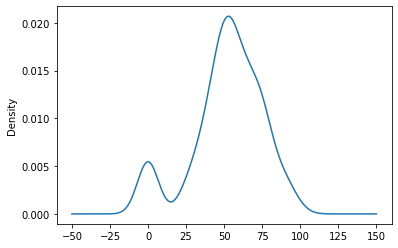

In [9]:
data.score.plot(kind='kde')

In [11]:
data.drop(data[data.score.isnull()].index, inplace=True)

### давайте посмотрим на вторую числовую числовую колонку 'absences'
- удалим выбросы, больше 100, так нам будет проще преобразовывать данные в будущем
- Пустые значения можно заполнить медианными значениями, но пока подождем, посмотрим можем ли мы их восстановить

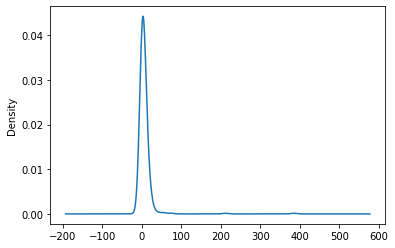

In [12]:
data.absences.plot(kind='kde')

- После удаления явных выбросов видно что распределение крайне ассиметричное
- сколько нибудь заметного тренда взаимосвязи с целевой переменной не наблюдается

(array([273.,  68.,  24.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

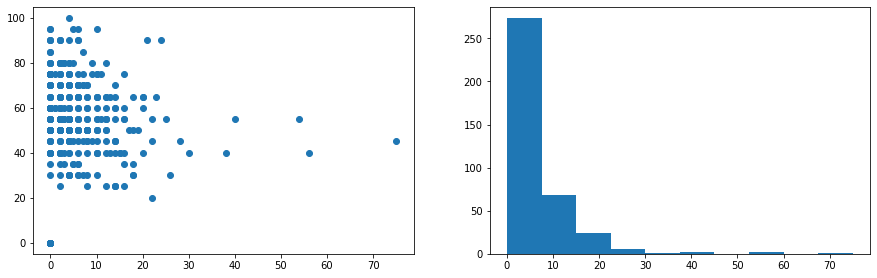

In [13]:
data.drop(data[data.absences > 100].index, inplace=True)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1).scatter(data.absences, data.score)
plt.subplot(2, 2, 2).hist(data.absences)

### Посмотрим на ранговые переменные
- Явного тренда взаимосвязи переменных как между собой, так и с целевой перенной на первый взгляд не наблюдаем
- Переменные 'studytime' и 'studytime, granular' скоррелированы по модулю абсолютно и вотрой является преобразованием первого

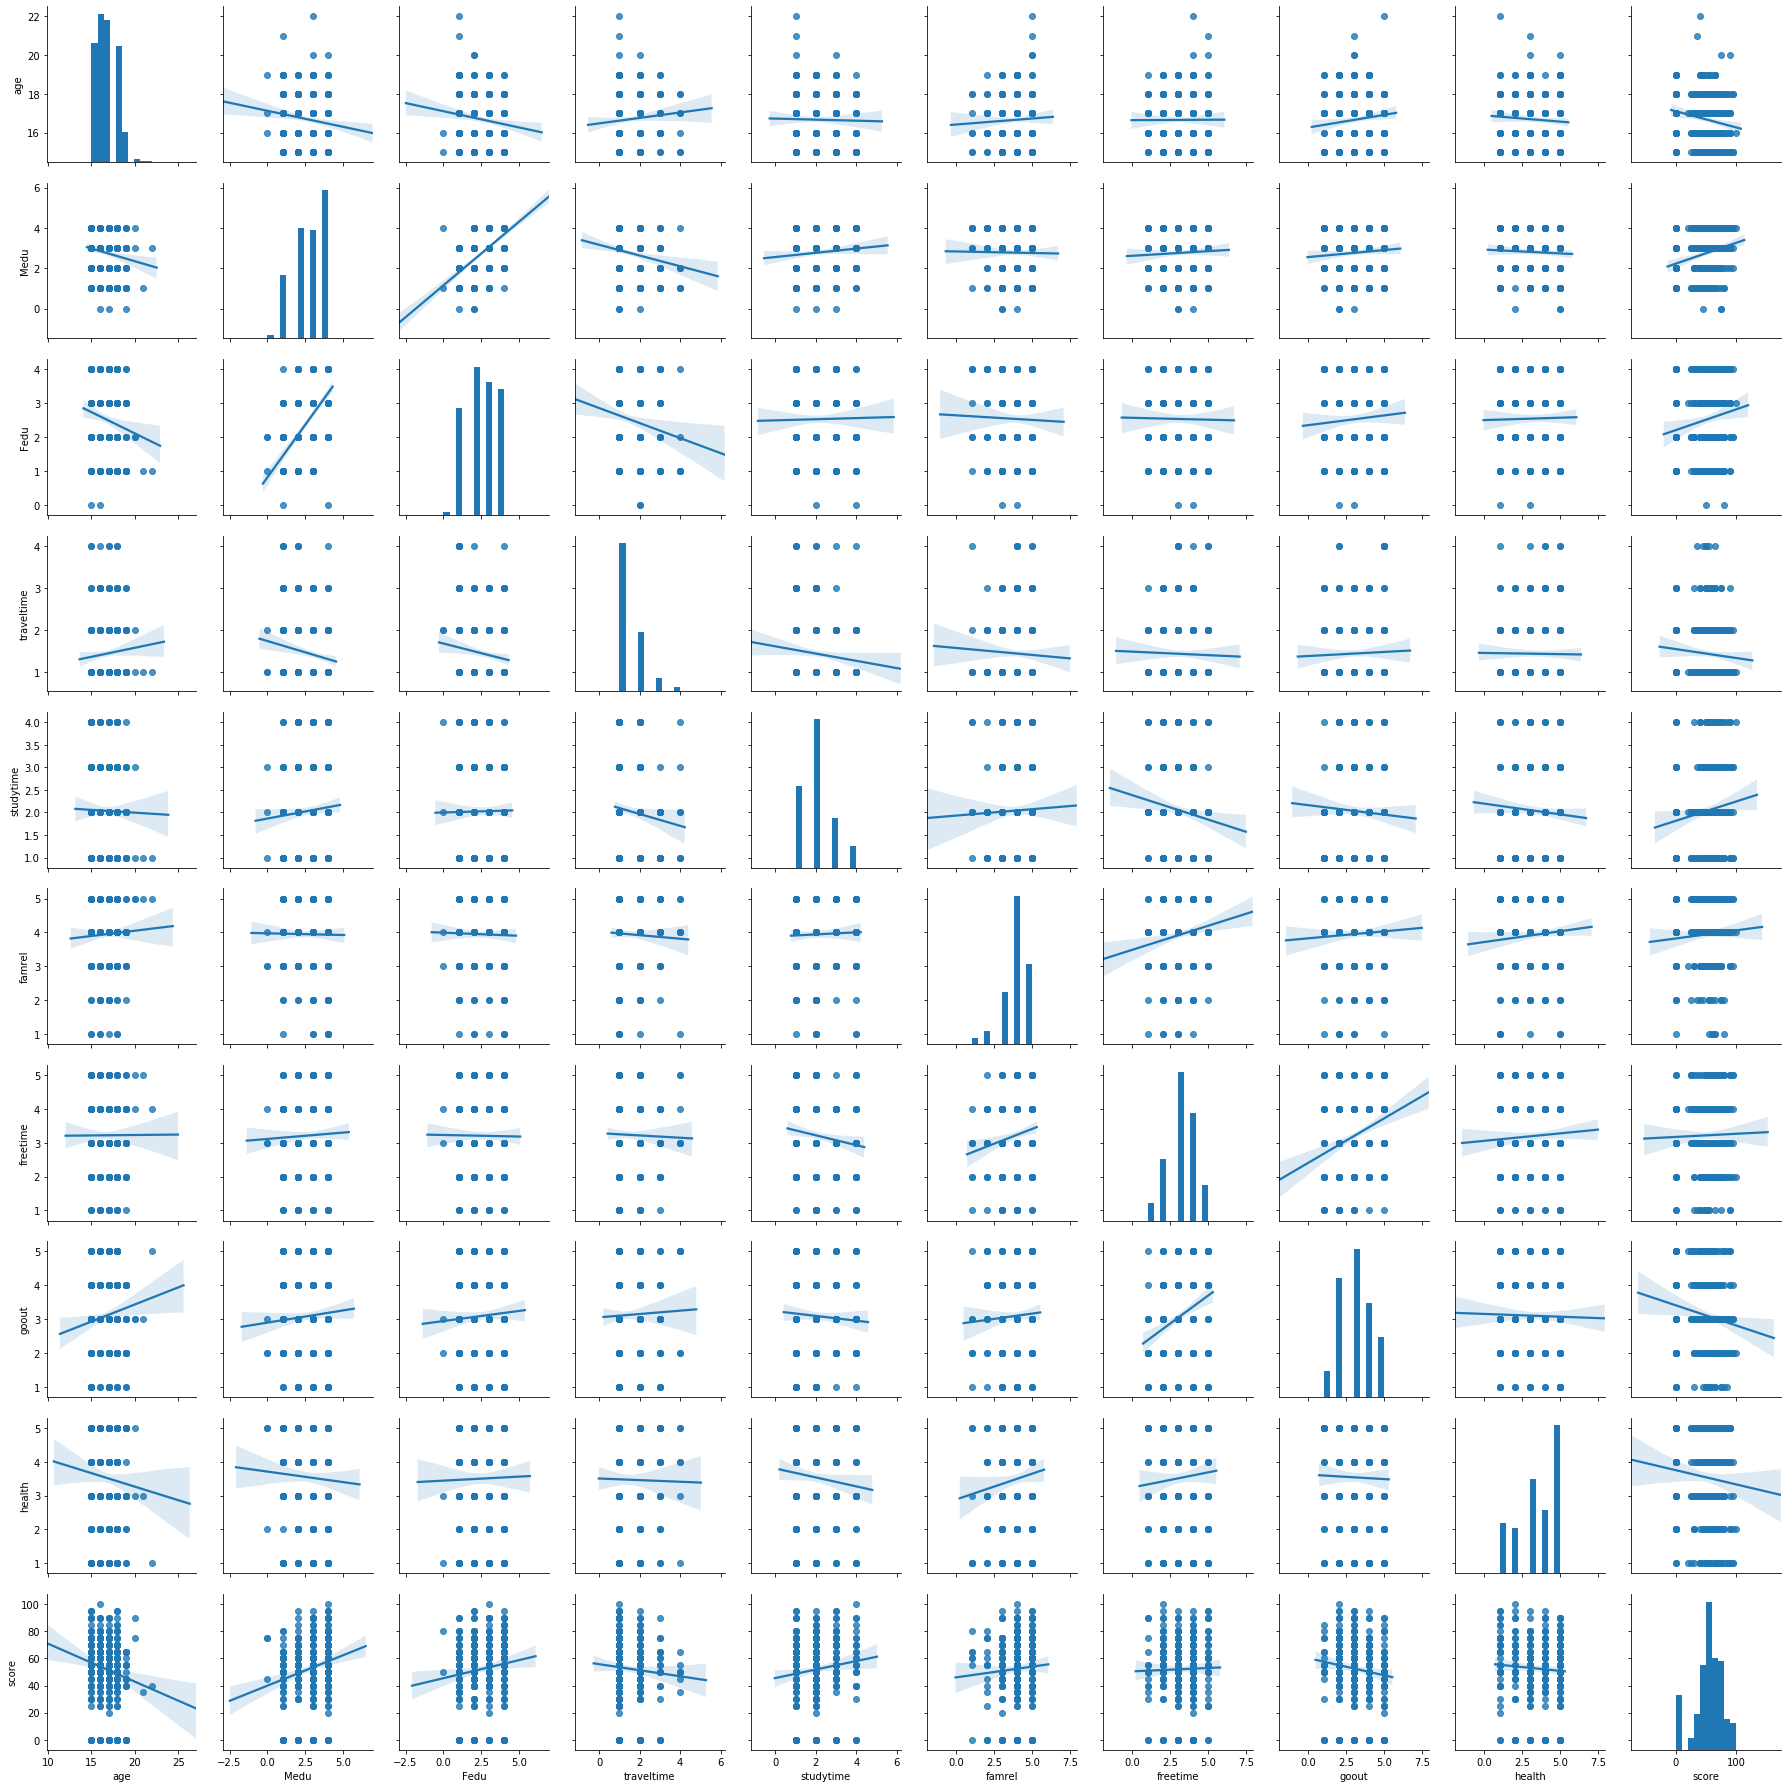

In [65]:
sns.pairplot(data[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
                   'goout', 'health', 'score']], kind='reg')

In [60]:
data[['studytime','studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


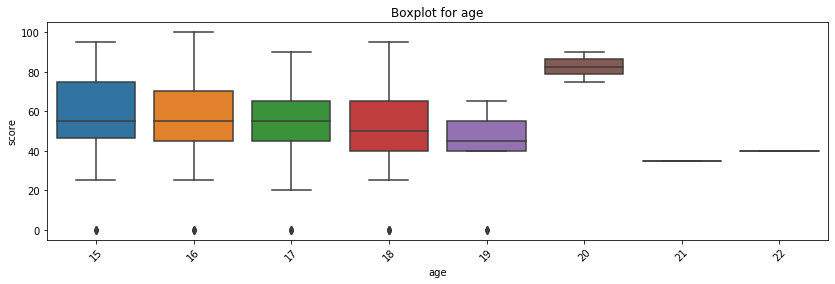

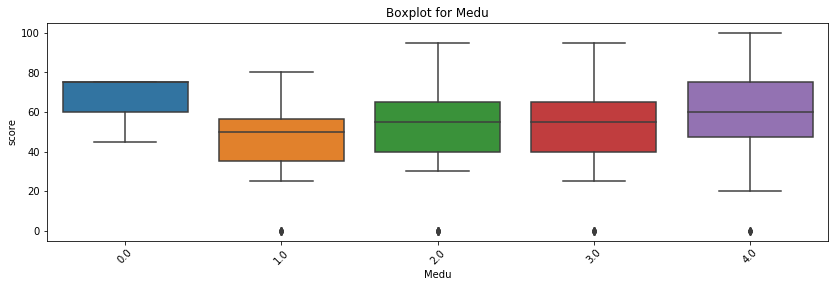

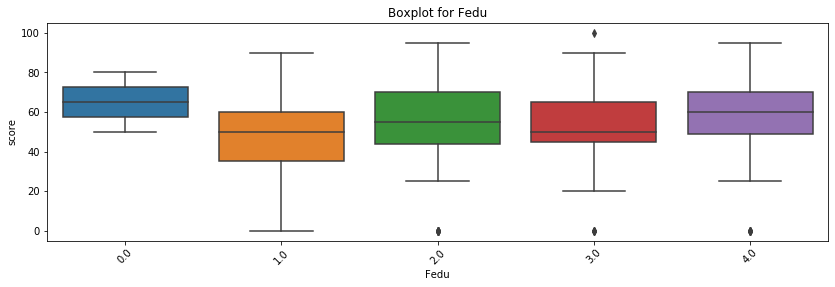

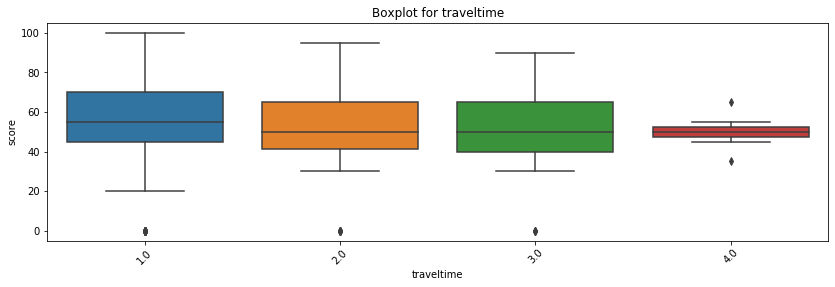

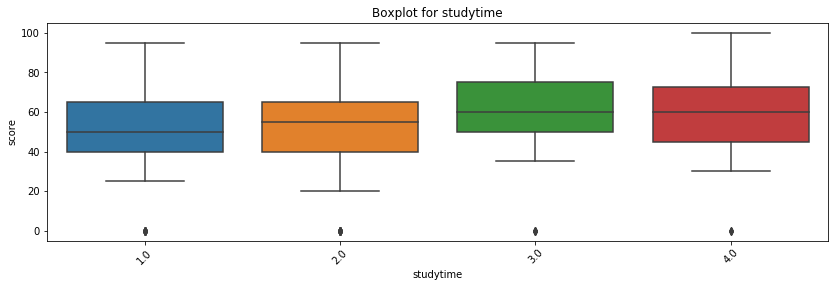

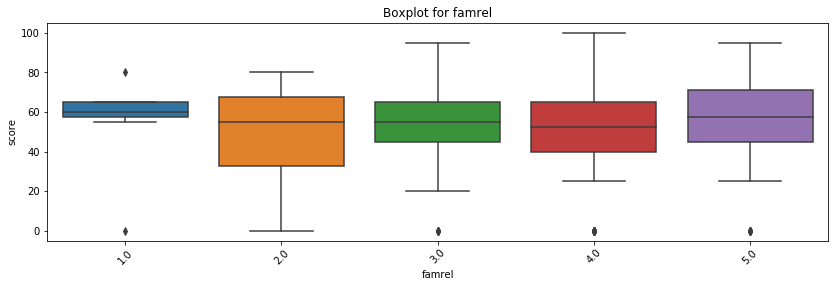

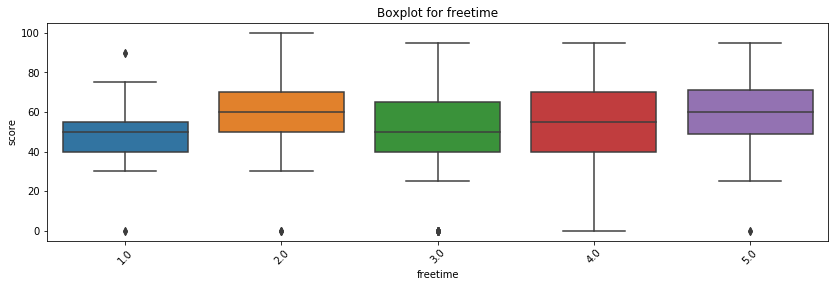

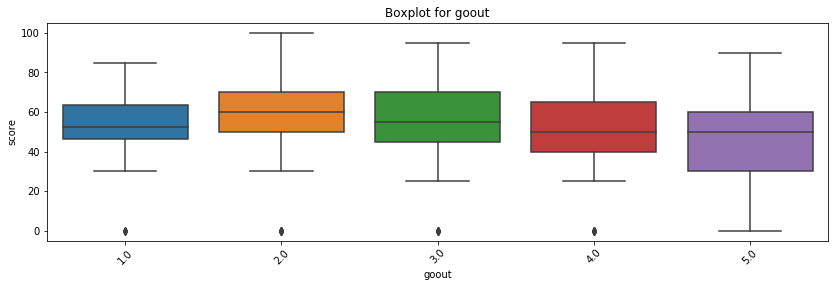

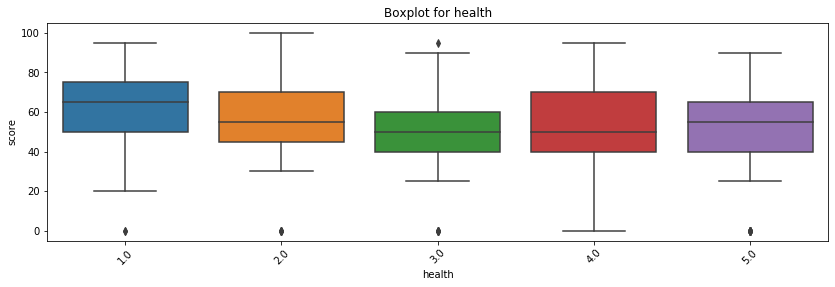

In [62]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=data.loc[data.loc[:, column].\
                                                   isin(data.loc[:, column].value_counts().index)], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

for column in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health',]:
    get_boxplot(column)

### Создадим новые переменные, возможно это даст нам что-то
- Переменные где уникальных значений всего 2, преобразуем в 0 и 1
- Переменную с возрастом, судя по боксплотам можно преобразовать с учетом старше среднего возраста студент или нет
- В переменных с образованием родителей, судя по боксплотам важно имеют ли они высшее образование или нет, попробуем
- В переменных с профессией родителей, больше всего откликнулась специализация 'teacher' и 'health', для этого признака создадим отдельные колонки
- Для перменной 'reason', создадим признаки для всех вариантов
- для перменной 'traveltime' есть отличие если путь до школы минимальный, давайте это признак выделим отдельно
- для переменной 'studytime' и 'failures' тоже ориентируемся по боксплотам

в любом случае этот процесс творческий и никто не застрахован от нелучших решений

In [15]:
data['school_gp'] = data.school.apply(lambda x: 1 if x == 'GP' else 0)
data['school_ms'] = data.school.apply(lambda x: 1 if x == 'MS' else 0)
data['female'] = data.sex.apply(lambda x: 1 if x == 'F' else 0)
data['male'] = data.sex.apply(lambda x: 1 if x == 'M' else 0)
data['rural'] = data.address.apply(lambda x: 1 if x == 'R' else 0)
data['urban'] = data.address.apply(lambda x: 1 if x == 'U' else 0)
data['big_age'] = data.age.apply(lambda x: 1 if x >= data.age.median() else 0)
data['three_memb_fam'] = data.famsize.apply(lambda x: 1 if x == 'GT3' else 0)
data['urban'] = data.address.apply(lambda x: 1 if x == 'U' else 0)
data['intact_fam'] = data.Pstatus.apply(lambda x: 1 if x == 'T' else 0)
data['m_higher_edu'] = data.Medu.apply(lambda x: 1 if x == 4. else 0)
data['f_higher_edu'] = data.Fedu.apply(lambda x: 1 if x == 4. else 0)
data['m_teacher'] = data.Mjob.apply(lambda x: 1 if x == 'teacher' else 0)
data['m_health'] = data.Mjob.apply(lambda x: 1 if x == 'health' else 0)
data['f_teacher'] = data.Fjob.apply(lambda x: 1 if x == 'teacher' else 0)
data['f_health'] = data.Fjob.apply(lambda x: 1 if x == 'health' else 0)
data['reason_course'] = data.reason.apply(lambda x: 1 if x == 'course' else 0)
data['reason_home'] = data.reason.apply(lambda x: 1 if x == 'home' else 0)
data['reason_reputation'] = data.reason.apply(lambda x: 1 if x == 'reputation' else 0)
data['reason_other'] = data.reason.apply(lambda x: 1 if x == 'other' else 0)
data['guardian_m'] = data.guardian.apply(lambda x: 1 if x == 'mother' else 0)
data['guardian_f'] = data.guardian.apply(lambda x: 1 if x == 'father' else 0)
data['guardian_other'] = data.guardian.apply(lambda x: 1 if x == 'other' else 0)
data['traveltime_min'] = data.traveltime.apply(lambda x: 1 if x == 1. else 0)
data['traveltime_max'] = data.traveltime.apply(lambda x: 1 if x > 1. else 0)
data['studytime_light'] = data.studytime.apply(lambda x: 1 if x <= 2. else 0)
data['studytime_hard'] = data.traveltime.apply(lambda x: 1 if x > 2. else 0)
data['no_failures'] = data.failures.apply(lambda x: 1 if x == 0. else 0)
data['no_schoolsup'] = data.schoolsup.apply(lambda x: 1 if x == 'no' else 0)
data['famsup_yes'] = data.famsup.apply(lambda x: 1 if x == 'yes' else 0)
data['paid_yes'] = data.paid.apply(lambda x: 1 if x == 'yes' else 0)
data['activities_yes'] = data.activities.apply(lambda x: 1 if x == 'yes' else 0)
data['nursery_yes'] = data.nursery.apply(lambda x: 1 if x == 'yes' else 0)
data['higher_yes'] = data.higher.apply(lambda x: 1 if x == 'yes' else 0)
data['internet_yes'] = data.internet.apply(lambda x: 1 if x == 'yes' else 0)
data['romantic_yes'] = data.romantic.apply(lambda x: 1 if x == 'yes' else 0)


### Теперь посмотрим возможные взаимосвязи для заполнения пропусков
Есть взаимосвязь наличия высшего образования и работы в сфере преподавания.
Если серьезно, то серьезных инсайтов для углубления в изучение данных для восстановления пропусков не наблюдается. Идем дальше

Теперь можно заполнить пропуски в колонке прогулов медианными значениями

In [64]:
data.iloc[:, 24:].corr()[abs(data.iloc[:, 24:].corr()) > .4]

,famrel,freetime,goout,health,absences,score,school_gp,school_ms,female,male,rural,urban,big_age,three_memb_fam,intact_fam,m_higher_edu,f_higher_edu,m_teacher,m_health,f_teacher,f_health,reason_course,reason_home,reason_reputation,guardian_m,guardian_f,guardian_other,reason_other,traveltime_min,traveltime_max,studytime_light,studytime_hard,no_failures,no_schoolsup,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
famrel,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freetime,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goout,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absences,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_gp,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_ms,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.absences.fillna(data.absences.median(), inplace=True)

### Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы

Тест показал что для будущей модели можно взять паметры sex, address, Medu, Mjob, failures, higher, romantic, goout. А так же параметры из вновь созданных признаков big_age, studytime_light, no_schoolsup и paid_yes

In [51]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [52]:
for column in data.columns:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score
Найдены статистически значимые различия для колонки female
Найдены статистически значимые различия для колонки male
Найдены статистически значимые различия для колонки rural
Найдены статистически значимые различия для колонки big_age
Найдены статистически значимые различия для колонки m_higher_edu
Найдены статистически значимые различия для колонки m_health
Найдены статистически значимые различия для колонки studytime_light
Найдены статистически значимые различия для к

# Выводы

- Целевая переменная имеет шум, распределение не нормальное
- В исследовании преобладают категориальные признаки
- Практически все переменные имеют пропуски избавиться от них нельзя (количество данных уменьшится в 10 раз), заполнить с высокой долей точности тоже